In [28]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import researchpy as rp
from statsmodels.stats.anova import anova_lm


# Topics

* Plot histgram
* Plot data and regression model
* statsmodels.regression.linear_model.OLS
* statsmodels : Fitting models using R-style formulas
* Hypothesis testing in multiple liner regression
* F-test
* T-test
* R-squared
* ANOVA : sum of squares(Which variables shoud be used?)

In [11]:
red_sample = pd.read_csv("data/red_sample")
red_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1,8.2,0.320,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.3,6
2,8.3,0.760,0.29,4.2,0.075,12.0,16.0,0.99650,3.45,0.68,11.5,6
3,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
4,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
145,7.8,0.530,0.04,1.7,0.076,17.0,31.0,0.99640,3.33,0.56,10.0,6
146,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
147,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5
148,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6


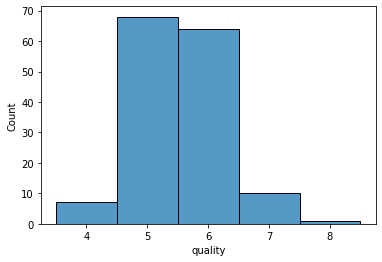

In [30]:
sns.histplot(data=red_sample, x="quality", discrete=True)

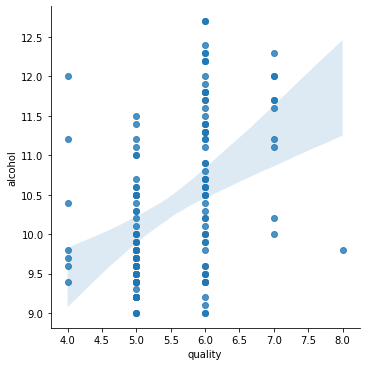

In [34]:
sns.lmplot(data=red_sample,x="quality",y="alcohol")

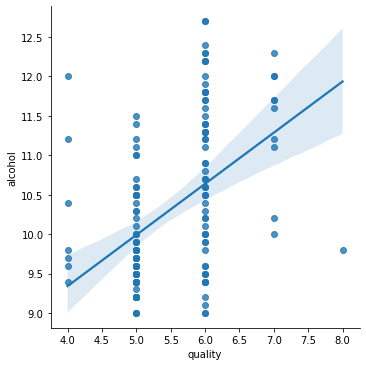

In [33]:
# robust = True : This will de-weight outliers.

sns.lmplot(data=red_sample,x="quality",y="alcohol", robust=True)

In [15]:
X = red_sample[["sulphates","alcohol"]]
y = red_sample['quality']

X = sm.add_constant(X)
mreg1 = sm.OLS(y, X).fit()
display(mreg1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     18.74
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           5.63e-08
Time:                        14:33:12   Log-Likelihood:                -146.12
No. Observations:                 150   AIC:                             298.2
Df Residuals:                     147   BIC:                             307.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9501      0.588      3.318      0.001       0.789       3.111
sulphates      0.4749      0.282      1.685      0.094      -0.082       1.032
alcohol        0.3160      0.054      5.820      0.000       0.209       0.423
==============================================================================
Omnibus:                       10.513   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               23.851
Skew:                           0.133   Prob(JB):                     6.62e-06
Kurtosis:                       4.935   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
mreg2 = smf.ols(formula='quality ~ sulphates + alcohol', data = red_sample).fit()
print(mreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     18.74
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           5.63e-08
Time:                        14:33:16   Log-Likelihood:                -146.12
No. Observations:                 150   AIC:                             298.2
Df Residuals:                     147   BIC:                             307.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9501      0.588      3.318      0.0

In [22]:
# different order from mreg2

mreg3 = smf.ols(formula='quality ~ alcohol + sulphates', data = red_sample).fit()
print(mreg3.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     18.74
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           5.63e-08
Time:                        14:38:57   Log-Likelihood:                -146.12
No. Observations:                 150   AIC:                             298.2
Df Residuals:                     147   BIC:                             307.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9501      0.588      3.318      0.0

# Hypothesis testing in multiple liner regression 

* Ho: Beta1 = Beta2 = 0 (zero) 
* Ha: At least one of Beta is NOT 0 (zero)


* **It compares a model with no predictors (in this case, no alcohol and no sulphates), referred to as the intercept-only model, to the specified model (inclusive of those two predictors listed above).**
* The null hypothesis is that **“all the regression coefficients are equal to zero”**, and the alternative hypothesis is that **"the intercept-only model is worse than the model with 2 independent variables"**.

* Intercept is a y value (on y-axis) when x-axis is zero. 
* Beta 1,2 are slopes (coefficients)
* F-statistic is never below zero. It is alawys positive value.

# Interpret the result 

#### F-test
* the p-value of the F-statistic is listed as **Prob (F-statistic)**. This is to assess the **significance level of all the variables together**.
* **Prob (F-statistic)** is **the probability that the null hypothesis for the full model is true.** Given these p-values(5.63e-08) are approximately zero, **reject the null**. 

* **There is evidence that there is a linear relationship between quality, and the set of predictors (alcohol and sulphates)**. Since the F-test only accounts for the target variable and **the set of all predictor variables, not considering the individual effects of each predictor**, it requres a separated t-test to find out indivisual effects of two independent variables.

#### T-test
* It looks at a relationship between indivisual independent varible and dependent variable. Alcohol vs quality, sulphates vs quality, for example. 
#### T-test for alcohol
* As p-value shows 0.000(less than 0.000), it is considered to be extremely statistically significant.
#### T-test for sulphates
* As p-value shows 0.094(The two-tailed P value equals 0.0941), it is considered to be NOT quite statistically significant.

#### R-squared
* 20.3% of variabilty in quality is explained by alcohol and sulpthates. 
* note: The regression’s R-squared **tends to rise as more and more variables are added, even if they have no significant contribution**.




# Colcultion
* **Reject Ho.**
#### Details
* **F-test : Reject Ho**
* **T-test for alcohol : Reject Ho**
* **T-test for sulphates : Failed to reject Ho**


https://ckhoward.github.io/post/chapter9multiple-regression-and-model-building/
https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0

# Which variables shoud be used?

In [26]:
anova_results2 = anova_lm(mreg2)
anova_results3 = anova_lm(mreg3)
print("anova_results 2")
display(anova_results2)
print("anova_results 3")
display(anova_results3)

anova_results 2


,df,sum_sq,mean_sq,F,PR(>F)
sulphates,1.0,1.513417,1.513417,3.610318,5.938028e-02
alcohol,1.0,14.198676,14.198676,33.871523,3.552841e-08
Residual,147.0,61.621241,0.419192,NaN,NaN


anova_results 3


,df,sum_sq,mean_sq,F,PR(>F)
alcohol,1.0,14.521738,14.521738,34.642202,2.577149e-08
sulphates,1.0,1.190355,1.190355,2.839640,9.408660e-02
Residual,147.0,61.621241,0.419192,NaN,NaN


#### Which variables shoud be used for liner regression model? 
* Sequential sum of squares **(sum_sq) is a useful procedure for choosing which variables to use** in a model, and an analysis of variance (ANOVA) will give us the sums of squares per each predictor that we need to do it. 

* Sequential sum of squares (sum_sq) for alcohol is 14.52 on "anova_results 3" , and that represents the variability in the quality rating that is explained by the linear relationship between quality and alcohol content. 
* The second sequential sum of squares, for sulphates content, 1.19, given that the variability explained by alcohol has already been extracted. In other words, **to list more definitive variables first (like alcohol), and the less-sure variables towards the end (like sulpathes)**.